# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

Path to dataset files: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3
Loading: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-105-dns.csv
Loading: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-186-dns.csv
Loading: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-26-dns.csv
Loading: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-4-dns.csv
Loading: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-95-dns.csv
Loading: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ubuntu-dns.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 

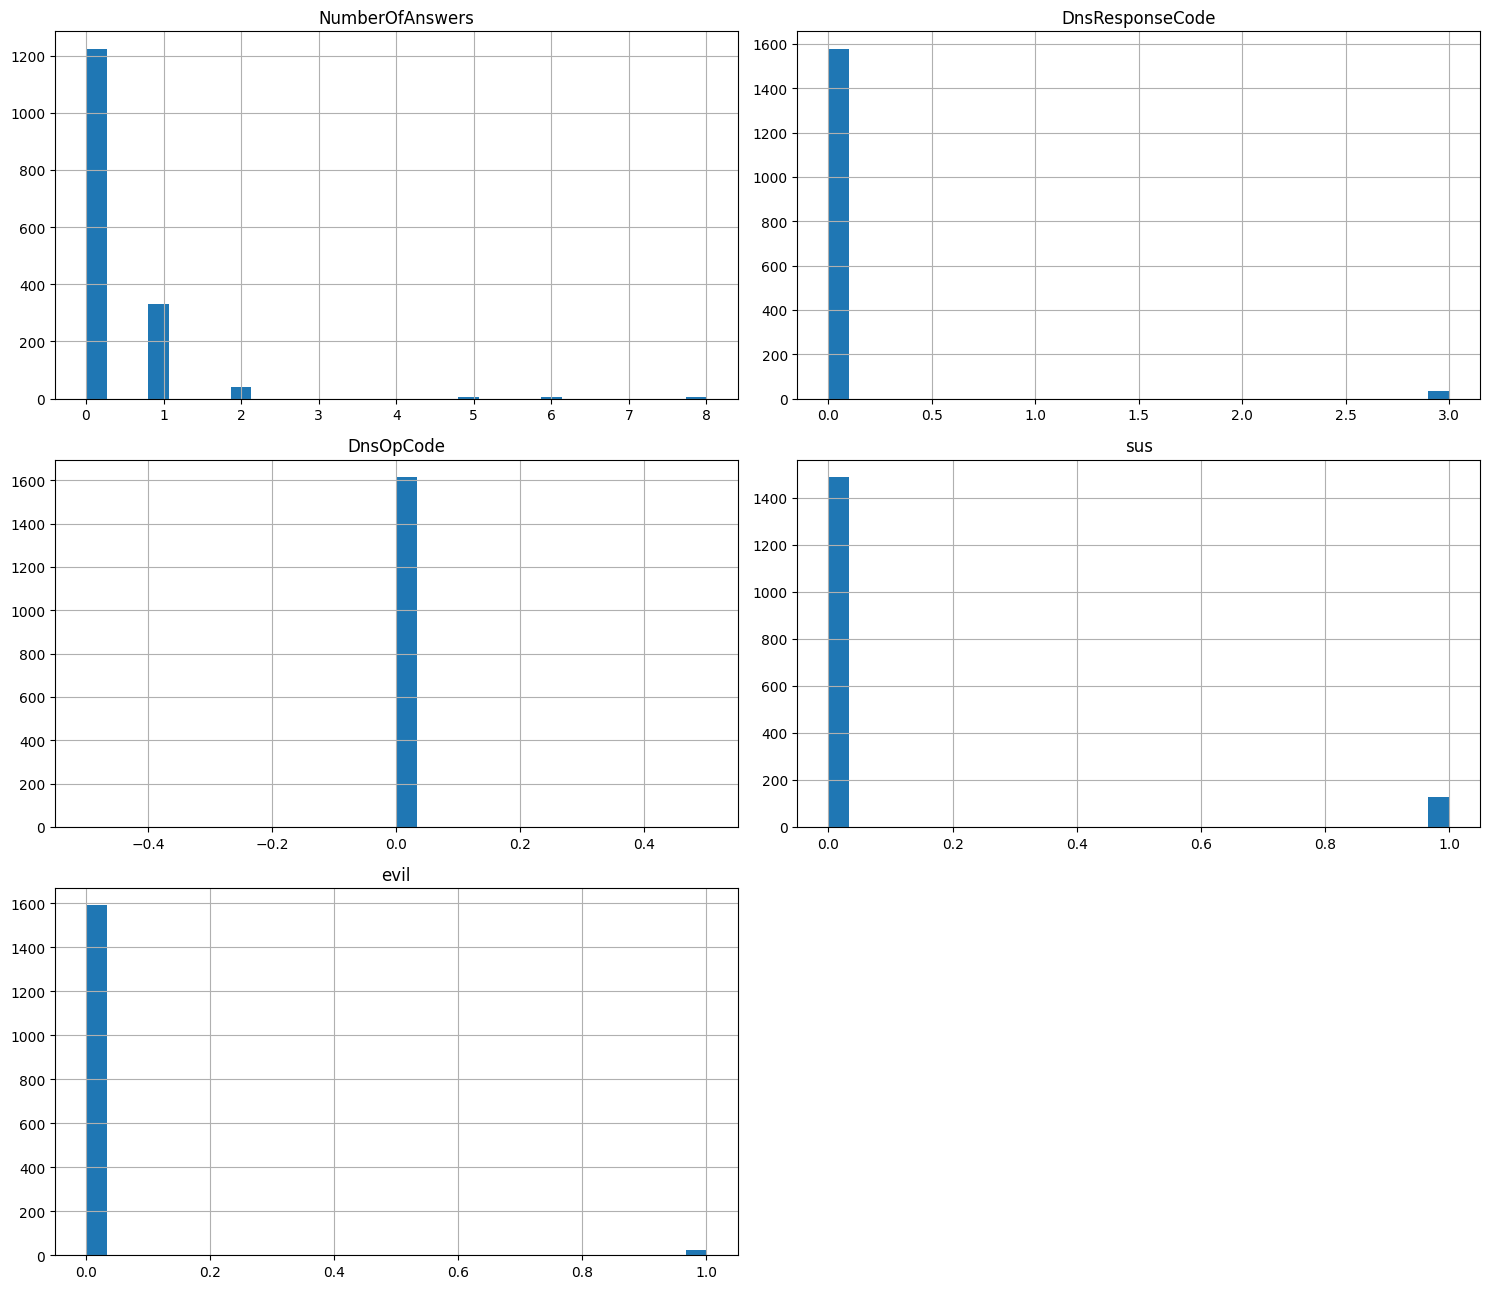

Timestamp             0
SourceIP              0
DestinationIP         0
DnsQuery              0
DnsAnswer          1224
DnsAnswerTTL       1224
DnsQueryNames         0
DnsQueryClass         0
DnsQueryType          0
NumberOfAnswers       0
DnsResponseCode       0
DnsOpCode             0
SensorId              0
sus                   0
evil                  0
dtype: int64
              Timestamp      SourceIP DestinationIP  \
0  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
1  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
2  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
3  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
4  2021-05-16T17:13:16Z  10.100.1.186    10.100.0.2   

                      DnsQuery         DnsAnswer DnsAnswerTTL  \
0  ssm.us-east-2.amazonaws.com               NaN          NaN   
1  ssm.us-east-2.amazonaws.com  ['52.95.19.240']       ['17']   
2  ssm.us-east-2.amazonaws.com               NaN          NaN   
3  ssm.us-east-2.amazonaws.com      

In [8]:
import kagglehub 
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
#downloads the dataset from kagglehub
beth_dataset = kagglehub.dataset_download("katehighnam/beth-dataset")
print("Path to dataset files:", beth_dataset)

#dns dataset
dns_dataset =[]
#I want to test out if I can join all the dataset that contains dns in it
for root, dirs, files in os.walk(beth_dataset):
    for file in files:
            if file.endswith(".csv") and "dns" in file.lower():
                  beth_dataset_path = os.path.join(root,file)
                  print(f"Loading: {beth_dataset_path}")
                  df = pd.read_csv(beth_dataset_path)
                  dns_dataset.append(df)
combined_dns = pd.concat(dns_dataset, ignore_index=True)

#assuming the dataset is named "labelled_2021may-ip-10-100-1-4-dns.csv" 
# beth_dataset_path_to_file = os.path.join(beth_dataset,"labelled_2021may-ip-10-100-1-4-dns.csv")
# print(beth_dataset_path_to_file) 
# beth_dataset_raw = pd.read_csv(beth_dataset_path_to_file)

#print out the head() and info()
combined_dns.info()
combined_dns.head()
combined_dns.columns.tolist()

#Now checking histograms
combined_dns.hist(figsize=(15,13), bins=30)
plt.tight_layout()
plt.show()

#checking if there is any duplicate rows
combined_dns.duplicated()
combined_dns.drop_duplicates()
#check if there are null values in any of the dataset
count_null = combined_dns.isnull().sum()
print(count_null)
combined_dns.isnull().sum()[combined_dns.isnull().sum() > 0]
#Since there are so many categorical features I want to encode them
encoder = OrdinalEncoder()
#then we will move on to remove features that are clearly not useful
#beth_dataset_clean = 
#getting the mean,meadian,and mode of each column
combined_dns.head()
print(combined_dns.head())
# beth_dataset_raw.mean()
# beth_dataset_raw.median()
# beth_dataset_raw.mode()

#checking for null values
# beth_dataset_raw.isnull()

